# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline

In [3]:
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic_data.shape

(891, 12)

**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [30]:
# Average age any passenger
ave1 = titanic_data.Age.mean()

In [31]:
# Ave age of survivors 
ave2 = titanic_data[titanic_data.Survived == 1].Age.mean()

In [54]:
# Ave age of non-surviving first-class passenger
ave3 = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Pclass == 1)].Age.mean()

In [55]:
# Ave age of male survivors older than 30 from anywhere but Queenstown
ave4 = titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age > 30) & (titanic_data.Survived == 1) \
            & (titanic_data.Embarked != 'Q')].Age.mean()

In [56]:
print(ave1)
print(ave2)
print(ave3)
print(ave4)

29.69911764705882
28.343689655172415
43.6953125
41.48780487804878


**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [57]:
# Differences between mean and median (mean - median) for all groups above
# Any passenger
diff1 = ave1 - titanic_data.Age.median()

In [58]:
# Survivors
diff2 = ave2 - titanic_data[titanic_data.Survived == 1].Age.median()

In [62]:
# Non-surviving first-class
diff3 = ave3 - titanic_data[(titanic_data.Survived == 0) & (titanic_data.Pclass == 1)].Age.median()

In [63]:
diff4 = ave4 - titanic_data[(titanic_data.Sex == 'male') & (titanic_data.Age > 30) & (titanic_data.Survived == 1) \
            & (titanic_data.Embarked != 'Q')].Age.median()

In [64]:
print(diff1)
print(diff2)
print(diff3)
print(diff4)

1.69911764705882
0.34368965517241534
-1.5546875
3.4878048780487774


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [65]:
# Most common passenger class
titanic_data.Pclass.mode()

0    3
dtype: int64

In [66]:
# Most common port of embarkation
titanic_data.Embarked.mode()

0    S
dtype: object

In [67]:
# Most common number of siblings/spouses aboard for survivors
titanic_data[titanic_data.Survived == 1].SibSp.mode()

0    0
dtype: int64

**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [71]:
fare_mean = titanic_data.Fare.mean()
fare_std = titanic_data.Fare.std()
fare_median = titanic_data.Fare.median()

print('The median {} is below the mean {} by {}, which is {} stds'.format(fare_median, fare_mean, \
                                                                          fare_median - fare_mean, \
                                                                          abs((fare_median - fare_mean) / fare_std)))

The median 14.4542 is below the mean 32.2042079685746 by -17.7500079685746, which is 0.3571902456652297 stds


**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [72]:
titanic_data.Fare.quantile(.9) - titanic_data.Fare.quantile(.05)

70.7333

**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [74]:
fare_by_port = pd.pivot_table(titanic_data, columns='Embarked', values='Fare')
fare_by_port

Embarked,C,Q,S
Fare,59.954144,13.27603,27.079812


**What is the most common passenger class for each port?**

In [76]:
import scipy.stats as stats
class_by_port = pd.pivot_table(titanic_data, columns='Embarked', values='Pclass', aggfunc=stats.mode)
class_by_port

Embarked,C,Q,S
Pclass,"([1], [85])","([3], [72])","([3], [353])"


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [79]:
sur_first_male = titanic_data[(titanic_data.Survived == 1) & (titanic_data.Pclass == 1) & (titanic_data.Sex == 'male')]

frac = len(sur_first_male[sur_first_male.Fare < fare_median * 2]) / len(sur_first_male)
frac

0.24444444444444444

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [81]:
sur_fam = titanic_data[(titanic_data.Survived == 1) & ((titanic_data.Parch > 0) | (titanic_data.SibSp > 0))]
nonsur_nonfam = titanic_data[(titanic_data.Survived == 0) & (titanic_data.Parch == 0) & (titanic_data.SibSp == 0)]

diff_age = sur_fam.Age.mean() - nonsur_nonfam.Age.mean()
diff_age


-6.888171076642337

**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

In [82]:
import math



**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [85]:
medians = pd.Series()
medians['Age'] = titanic_data.Age.median()
medians['Ticket Price'] = titanic_data.Fare.median()
medians['Siblings/Spouses'] = titanic_data.SibSp.median()
medians['Parents/Children'] = titanic_data.Parch.median()

medians

Age                 28.0000
Ticket Price        14.4542
Siblings/Spouses     0.0000
Parents/Children     0.0000
dtype: float64

**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [86]:
def survival_ratio(predicate):
    series = titanic_data[predicate]
    return len(series[series['Survived'] == True]) / len(series)

below_at_median = pd.Series(name='Surv. below/at median')
above_median = pd.Series(name='Surv. above median')



**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

Text(0,0.5,'Number of Passengers')

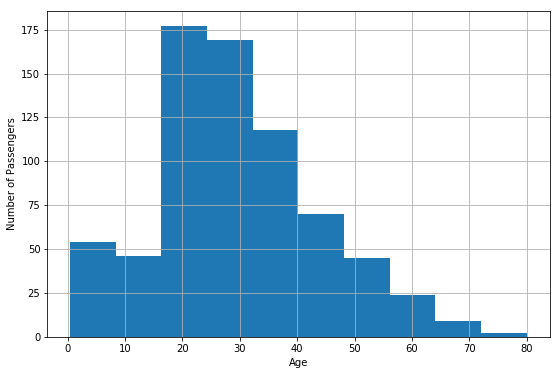

In [87]:
ax = titanic_data.Age.hist(figsize=(9,6), bins=10)
ax.set_xlabel('Age')
ax.set_ylabel('Number of Passengers')

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [99]:
p_sur = len(titanic_data[titanic_data.Survived == 1]) / len(titanic_data)
p_male = titanic_data[titanic_data.Sex == 'male'].Sex.value_counts() / len(titanic_data)
p_female_1sibsp = titanic_data[(titanic_data.Sex == 'female') & (titanic_data.SibSp > 0)].Sex.value_counts() / len(titanic_data)

df = titanic_data.copy()
p_sur_C = len(df[(df.Survived == 1) & (df.Embarked == 'C')])/ len(df)

p_lt10 = len(df[df.Age < 10]) / len(df)
p_25_40 = len(df[(df.Age > 25) & (df.Age < 40)]) / len(df)
p_lt20_gt50 = len(df[(df.Age < 20) | (df.Age > 50)]) / len(df)

print(p_sur)
print(p_male)
print(p_female_1sibsp)
print(p_sur_C)
print(p_lt10)
print(p_25_40)
print(p_lt20_gt50)

0.3838383838383838
male    0.647587
Name: Sex, dtype: float64
female    0.157127
Name: Sex, dtype: float64
0.10437710437710437
0.06958473625140292
0.28058361391694725
0.2558922558922559


**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [98]:
stats.binom.pmf(k=42, n=100, p=p_sur)

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [103]:
p_atleast42 = 1 - stats.binom.cdf(k=41, n=100, p=p_sur)
p_atleast42

0.25940724207261701

**Take random samples of 100 passengers and find out how many you need before the fraction of those samples where at least 42 passengers survive matches the probability you calculated previously (within Δp≈0.05).**

Answers will vary based on chosen seeds. What would happen if you drew every sample with the same seed?

Plot the survival fraction vs the number of random samples.

In [106]:
samples = pd.DataFrame(index=['n_survivors', 'at_least_42', 'cumulative_frac'])
cumulative_frac = 0

seed = 7
_iter = 1

while abs(cumulative_frac - p_atleast42) >= 0.05:
    sample = df.sample(n=100, random_state=seed)
    n_survivors = sample['Survived'].sum()
    at_least_42 = n_survivors >= 42
    print(at_least_42)
    n_prev_success = samples.transpose()['at_least_42'].sum()
    cumulative_frac = (at_least_42 + n_prev_success) / ( 1 + len(samples.columns))
    samples[_iter] = [n_survivors, at_least_42, cumulative_frac]
    _iter += 1
    seed = seed + 7
    
print('{} samples were needed to get a fraction of {}.'.format(_iter-1, cumulative_frac))



False
False
False
False
True
False
False
False
True
9 samples were needed to get a fraction of 0.2222222222222222.


**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**Use a 95% confidence level.**

In [108]:
sur_age_not_null = df[df.Survived == 1].dropna(subset=['Age'])
sur_male_ages = sur_age_not_null[df.Sex == 'male'].Age
sur_female_ages = sur_age_not_null[df.Sex == 'female'].Age

stats.ttest_ind(a=sur_male_ages, b=sur_female_ages, equal_var=False)

/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/Frank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Ttest_indResult(statistic=-0.79089662277024664, pvalue=0.43018823932007377)

In [109]:
q_fares = df[df.Embarked == 'Q'].Fare
c_fares = df[df.Embarked == 'C'].Fare

stats.ttest_ind(a=q_fares, b=c_fares, equal_var=False)

Ttest_indResult(statistic=-6.9951971047186809, pvalue=4.5792033919567422e-11)

**Accompany your p-values with histograms showing the distributions of both compared populations.**

Text(0,0.5,'Number of Passengers')

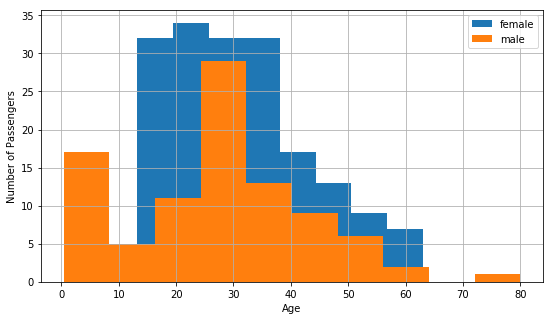

In [111]:
ax = sur_female_ages.hist(bins=10, label='female', figsize=(9,5))
ax = sur_male_ages.hist(bins=10, label='male', ax=ax)
ax.legend(loc='best')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Passengers')

Text(0,0.5,'Number of Passengers')

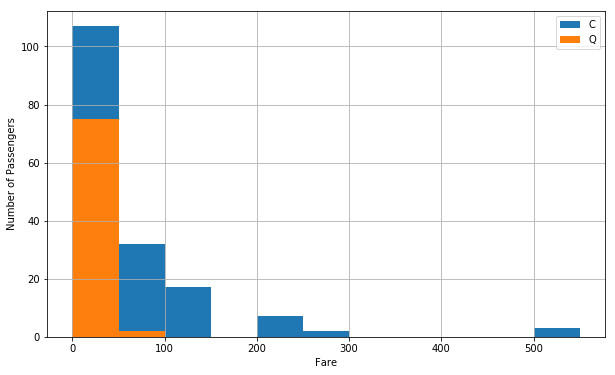

In [116]:
bins0_600 = range(0, 600, 50)
bx = c_fares.hist(bins=bins0_600, label='C', figsize=(10,6))
bx = q_fares.hist(bins=bins0_600, label='Q', ax=bx)

bx.legend()
bx.set_xlabel('Fare')
bx.set_ylabel('Number of Passengers')

**Did survivors pay more for their tickets than those that did not? Use a 95% confidence level.**

In [118]:
surv_fares = df[df.Survived == 1].Fare
nonsurv_fares = df[df.Survived == 0].Fare

print(surv_fares.mean() - nonsurv_fares.mean())

two_side_ttest = stats.ttest_ind(a=surv_fares, b=nonsurv_fares, equal_var=False)

print('t-stat = ', two_side_ttest.statistic)
print('one-sided p-value = ', two_side_ttest.pvalue/2)

26.277520717093292
t-stat =  6.83909925909
one-sided p-value =  1.34966617516e-11


**Did a given first-class passenger have fewer family members on board than a given third-class passenger? Use a 95% confidence level.**

In [120]:
first_class = df[df.Pclass == 1]
third_class = df[df.Pclass == 3]

fam_first = first_class.SibSp + first_class.Parch
fam_third = third_class.SibSp + third_class.Parch

print(fam_first.mean() - fam_third.mean())

ttest2 = stats.ttest_ind(a=fam_first, b=fam_third, equal_var=False)

print('t-stat = ', ttest2.statistic)
print('one-sided p-value = ', ttest2.pvalue / 2)

-0.2349984913630534
t-stat =  -2.07990757489
one-sided p-value =  0.0189536928743
